In [109]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal
from glob import glob
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import get_body, SkyCoord, AltAz, EarthLocation, Angle
from copy import deepcopy

In [25]:
oldpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/'
newpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/'

In [26]:
uvdraw = UVData()

In [27]:
uvdraw.read(glob(oldpath+'RawData/2457549/zen.2457549.64017.*.HH.uvcRP'))

In [28]:
# Check for whether all the data are flagged and whether the sun is up

In [29]:
numflags = uvdraw.flag_array.sum()
numdata = np.array(uvdraw.flag_array.shape).prod()
if (numflags == numdata):
    print('All are flagged')
else:
    print('{:.2f}% are flagged'.format(numflags/numdata*100.))

7.34% are flagged


In [30]:
times = Time(np.unique(uvdraw.time_array), format='jd')

In [31]:
# HERA Lat / Lon
lat, lon, alt = uvdraw.telescope_location_lat_lon_alt_degrees
latitude = Angle(lat*u.deg)
longitude = Angle(lon*u.deg)
# This is GEODETIC
karoo = EarthLocation(longitude, latitude, height=alt*u.m)

In [32]:
sun = get_body('sun', times)

In [33]:
sun_altaz = sun.transform_to(AltAz(location = karoo))#, obstime=times))

In [34]:
sun_altaz.alt.deg

array([-26.34521328, -26.30765173, -26.27009289, -26.23253675,
       -26.19498331, -26.15743259, -26.11988459, -26.0823393 ,
       -26.04479674, -26.0072569 , -25.9697198 , -25.93218544,
       -25.89465381, -25.85712493, -25.8195988 , -25.78207543,
       -25.74455481, -25.70703695, -25.66952185, -25.63200953,
       -25.59449998, -25.55699321, -25.51948922, -25.48198802,
       -25.44448961, -25.40699399, -25.36950118, -25.33201116,
       -25.29452396, -25.25703956, -25.21955798, -25.18207922,
       -25.14460329, -25.10713018, -25.06965991, -25.03219247,
       -24.99472788, -24.95726613, -24.91980722, -24.88235118,
       -24.84489799, -24.80744766, -24.77000034, -24.73255575,
       -24.69511404, -24.6576752 , -24.62023925, -24.58280619,
       -24.54537602, -24.50794874, -24.47052436, -24.43310289,
       -24.39568433, -24.35826868, -24.32085595, -24.28344614])

In [115]:
# Can we also check if all the baselines have the same flags?  
# I think this will simplify things a lot
# Also, identify bad antennas?  I think two of them just had their x/y reversed (?)
# How do I easily get all waterfalls?

In [35]:
from pyuvdata import utils

In [ ]:
# Check whether all waterfalls have the same flags

In [41]:
bls = uvdraw.get_antpairpols()

In [42]:
uvdraw.flag_array.shape

(10640, 1, 1024, 4)

In [43]:
flags = np.reshape(uvdraw.flag_array.copy(), 
                   [uvdraw.Ntimes, uvdraw.Nbls, 1, uvdraw.Nfreqs, uvdraw.Npols])

In [47]:
print(True or True)
print(True or False)
print(False or False)

True
True
False


In [51]:
test = np.zeros(10, dtype='bool')

In [79]:
bad_ants = [22, 43, 80, 81]

In [95]:
nwaterfall = uvdraw.Ntimes * uvdraw.Nfreqs
waterfall_flags = np.zeros([uvdraw.Ntimes, uvdraw.Nfreqs], dtype='bool')
waterfall_hits = np.zeros([uvdraw.Ntimes, uvdraw.Nfreqs])
waterfall_no_flags_bad_ants = np.zeros([uvdraw.Ntimes, uvdraw.Nfreqs], dtype='bool')
waterfall_hits_no_bad_ants = np.zeros([uvdraw.Ntimes, uvdraw.Nfreqs])
flag_dict = {}
for bl in bls:
    fl = uvdraw.get_flags(bl)
    flag_dict[bl] = fl
    waterfall_flags = np.logical_or(fl, waterfall_flags)
    if (bl[0] in bad_ants) or (bl[1] in bad_ants):
        print('Excluding', bl)
    else:
        waterfall_flags_no_bad_ants = np.logical_or(fl, waterfall_flags_no_bad_ants)
        waterfall_hits_no_bad_ants += fl
    waterfall_hits += fl
    #print(bl, '{:.2f}% flagged'.format(fl.sum()/nwaterfall*100.))

Excluding (9, 22, 'xx')
Excluding (9, 22, 'yy')
Excluding (9, 22, 'xy')
Excluding (9, 22, 'yx')
Excluding (9, 43, 'xx')
Excluding (9, 43, 'yy')
Excluding (9, 43, 'xy')
Excluding (9, 43, 'yx')
Excluding (9, 80, 'xx')
Excluding (9, 80, 'yy')
Excluding (9, 80, 'xy')
Excluding (9, 80, 'yx')
Excluding (9, 81, 'xx')
Excluding (9, 81, 'yy')
Excluding (9, 81, 'xy')
Excluding (9, 81, 'yx')
Excluding (10, 22, 'xx')
Excluding (10, 22, 'yy')
Excluding (10, 22, 'xy')
Excluding (10, 22, 'yx')
Excluding (10, 43, 'xx')
Excluding (10, 43, 'yy')
Excluding (10, 43, 'xy')
Excluding (10, 43, 'yx')
Excluding (10, 80, 'xx')
Excluding (10, 80, 'yy')
Excluding (10, 80, 'xy')
Excluding (10, 80, 'yx')
Excluding (10, 81, 'xx')
Excluding (10, 81, 'yy')
Excluding (10, 81, 'xy')
Excluding (10, 81, 'yx')
Excluding (20, 22, 'xx')
Excluding (20, 22, 'yy')
Excluding (20, 22, 'xy')
Excluding (20, 22, 'yx')
Excluding (20, 43, 'xx')
Excluding (20, 43, 'yy')
Excluding (20, 43, 'xy')
Excluding (20, 43, 'yx')
Excluding (20, 8

In [84]:
# OK, I'm glad I checked.  Flags are not homogenized across waterfalls, nor are 
# bad antennas flagged

# For this case, it seems that leaving out the flagged antennas doesn't change the 
# final logical OR of the flags, but this need not always be the case ...

In [85]:
print('{:.2f}% flagged'.format(waterfall_flags.sum()/nwaterfall*100.))

24.74% flagged


divide by zero encountered in log10


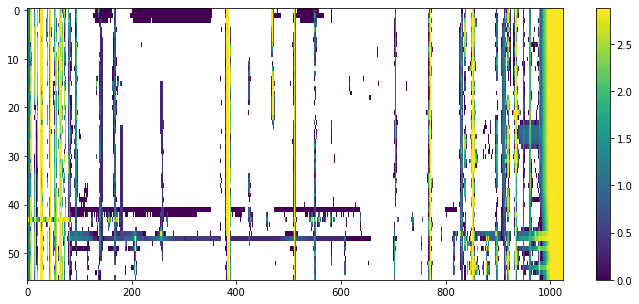

In [96]:
plt.figure(figsize=(12,5))
plt.imshow(np.log10(waterfall_hits), aspect='auto')
plt.colorbar()
plt.show()

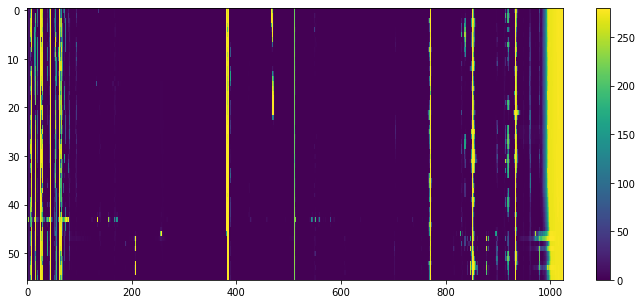

In [97]:
plt.figure(figsize=(12,5))
plt.imshow(waterfall_hits-waterfall_hits_no_bad_ants, aspect='auto')
plt.colorbar()
plt.show()

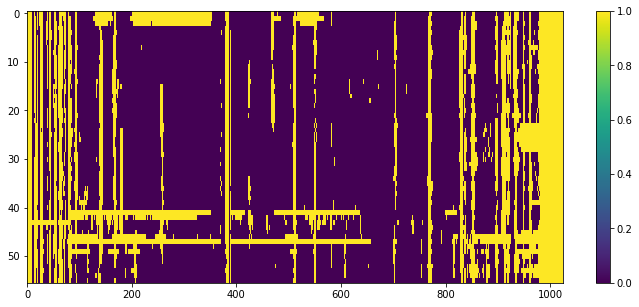

In [90]:
plt.figure(figsize=(12,5))
plt.imshow(np.array(waterfall_flags_no_bad_ants,dtype='float64'), aspect='auto')
plt.colorbar()
plt.show()

In [92]:
thefuck = np.array(waterfall_flags,dtype='float64') - np.array(waterfall_flags_no_bad_ants,dtype='float64')

In [94]:
waterfall_flags == waterfall_flags_no_bad_ants

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

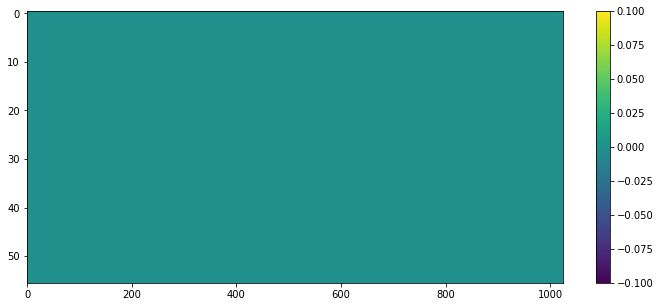

In [91]:
plt.figure(figsize=(12,5))
plt.imshow(np.array(waterfall_flags,dtype='float64') - 
           np.array(waterfall_flags_no_bad_ants,dtype='float64'), aspect='auto')
plt.colorbar()
plt.show()

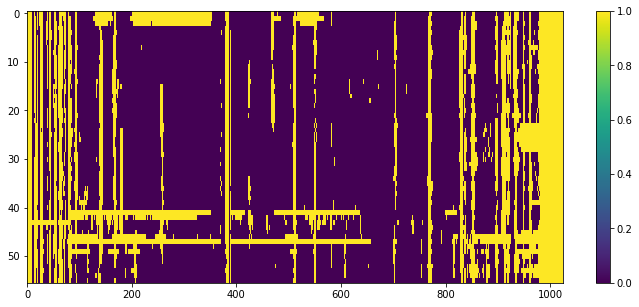

In [70]:
plt.figure(figsize=(12,5))
plt.imshow(np.array(waterfall_flags,dtype='float64'), aspect='auto')
plt.colorbar()
plt.show()

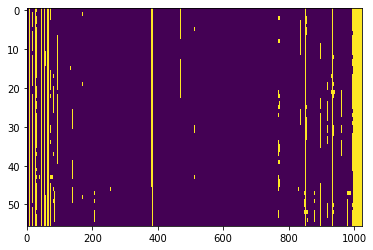

In [60]:
plt.imshow(flag_dict[(96, 105, 'xy')], aspect='auto')

In [107]:
# Let's add flagging for band edges and greedy thresholds in frequency and time
band_edges = np.logical_or(uvdraw.freq_array.squeeze() < 110e6, uvdraw.freq_array.squeeze() > 190e6)

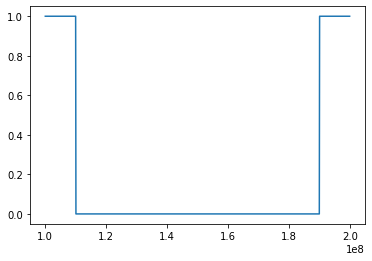

In [108]:
plt.plot(uvdraw.freq_array.squeeze(), band_edges)

In [110]:
waterfall_conservative = deepcopy(waterfall_flags)

In [112]:
waterfall_conservative[:,band_edges] = True

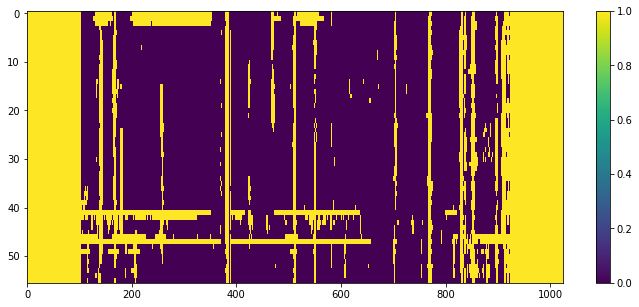

In [113]:
plt.figure(figsize=(12,5))
plt.imshow(np.array(waterfall_conservative,dtype='float64'), aspect='auto')
plt.colorbar()
plt.show()

In [126]:
# Now let's be ultraconservative
waterfall_ultraconservative = deepcopy(waterfall_conservative)
time_frac = waterfall_conservative.sum(axis=1)/uvdraw.Nfreqs
freq_frac = waterfall_conservative.sum(axis=0)/uvdraw.Ntimes

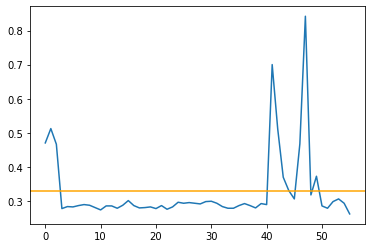

In [125]:
plt.plot(time_frac)
plt.axhline(0.33,color='orange')

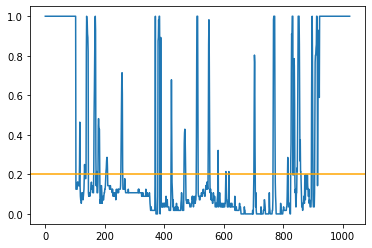

In [129]:
plt.plot(freq_frac)
plt.axhline(0.20,color='orange')

In [131]:
waterfall_ultraconservative[time_frac>0.33,:] = True
waterfall_ultraconservative[:,freq_frac>0.20] = True

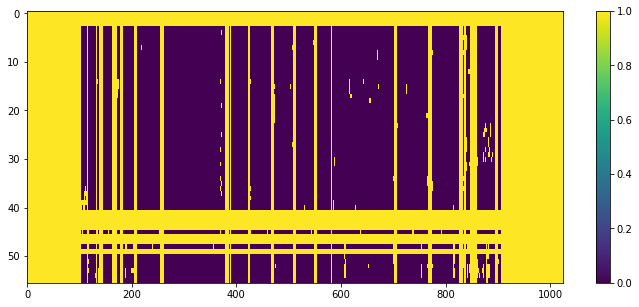

In [132]:
plt.figure(figsize=(12,5))
plt.imshow(np.array(waterfall_ultraconservative,dtype='float64'), aspect='auto')
plt.colorbar()
plt.show()

In [164]:
uvdraw2 = deepcopy(uvdraw)

In [165]:
uvdraw2 == uvdraw

True

In [166]:
def uvd_alter_bl(_uvd, bl, new_data, attr='data'):
    """ Modify the data in a UVData object by specified baseline, i.e., 
    all freq / time data for a particular waterfall """
    
    uvd = deepcopy(_uvd)
    
    inds = uvd._key2inds(bl)[0]
    
    """ Check that the new data is Ntimes x Nfreq """
    assert new_data.shape == (uvd.Ntimes, uvd.Nfreqs)
    
    """ Ugh ... how do I convert 'yy' to an index in the data array? """
    
    if attr == 'data':
        uvd.data_array[inds, 0, :, pol] = new_data
        
    if attr == 'flag':
        uvd.flag_array[inds, 0, :, pol] = new_data
        
    return uvd

In [147]:
len(uvdraw._key2inds(bls[5])[0])

56

In [153]:
test = uvdraw.get_data(bls[5])
test.shape == (uvdraw.Ntimes, uvdraw.Nfreqs)

True

In [157]:
utils.polstr2num?

In [160]:
uvdraw.polarization_array

array([-5, -6, -7, -8])

In [156]:
bls[5][2]

'yy'

In [15]:
uvdraw.write_uvh5(newpath+'RawData/2457549/zen.2457549.64017.uvcRP.uvh5')

In [21]:
uvdraw.phase_type

In [23]:
uvdraw.write_uvfits(newpath+'RawData/2457549/zen.2457549.64017.uvcRP.uvfits', 
                    force_phase=True, spoof_nonessential=True)

In [19]:
uvdraw.write_uvfits?

In [162]:
uvdraw.get_pols()

['xx', 'yy', 'xy', 'yx']

In [ ]:
uvdraw.flag_array